# **Sentiment analysis of Google reviews for the Tour Eiffel**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.style.use('dark_background')
import seaborn as sns
import nltk

In [2]:
#Data is extracted using Outscraper
df = pd.read_csv('https://raw.githubusercontent.com/rajupreti/PersonalProjects/main/SentimentAnalysis/eiffelreview.csv')

In [3]:
df.head()

,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,...,reviews_id,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5,review_questions_Visited on,review_questions_Wait time,review_questions_Reservation recommended,review_questions
0,"Tour Eiffel, Av. Gustave Eiffel, 75007 Paris",Eiffel Tower,0x47e66e2964e34e2d:0x8ddca9ee380ef7e0,ChIJLU7jZClu5kcR4PcOOO6p3I0,https://www.google.com/maps/place/Eiffel+Tower...,https://search.google.com/local/reviews?placei...,394729,4.7,ChZDSUhNMG9nS0VJQ0FnSUN6MGJDbkp3EAE,CAESY0NBRVFBUnBFUTJwRlNVRlNTWEJEWjI5QlVEZGZURU...,...,-8224511978877552672,8786,5218,16923,52996,310806,Weekday,10–30 min,NaN,NaN
1,"Tour Eiffel, Av. Gustave Eiffel, 75007 Paris",Eiffel Tower,0x47e66e2964e34e2d:0x8ddca9ee380ef7e0,ChIJLU7jZClu5kcR4PcOOO6p3I0,https://www.google.com/maps/place/Eiffel+Tower...,https://search.google.com/local/reviews?placei...,394729,4.7,ChdDSUhNMG9nS0VJQ0FnSUNqc3JIWl9BRRAB,CAESY0NBRVFBaHBFUTJwRlNVRlNTWEJEWjI5QlVEZGZURU...,...,-8224511978877552672,8786,5218,16923,52996,310806,Weekday,10–30 min,Yes,NaN
2,"Tour Eiffel, Av. Gustave Eiffel, 75007 Paris",Eiffel Tower,0x47e66e2964e34e2d:0x8ddca9ee380ef7e0,ChIJLU7jZClu5kcR4PcOOO6p3I0,https://www.google.com/maps/place/Eiffel+Tower...,https://search.google.com/local/reviews?placei...,394729,4.7,ChZDSUhNMG9nS0VJQ0FnSUQ5cnRuRkVnEAE,CAESY0NBRVFBeHBFUTJwRlNVRlNTWEJEWjI5QlVEZGZURU...,...,-8224511978877552672,8786,5218,16923,52996,310806,Weekday,No wait,No,NaN
3,"Tour Eiffel, Av. Gustave Eiffel, 75007 Paris",Eiffel Tower,0x47e66e2964e34e2d:0x8ddca9ee380ef7e0,ChIJLU7jZClu5kcR4PcOOO6p3I0,https://www.google.com/maps/place/Eiffel+Tower...,https://search.google.com/local/reviews?placei...,394729,4.7,ChZDSUhNMG9nS0VJQ0FnSUNkemZlV1ZREAE,CAESY0NBRVFCQnBFUTJwRlNVRlNTWEJEWjI5QlVEZGZURU...,...,-8224511978877552672,8786,5218,16923,52996,310806,NaN,NaN,NaN,NaN
4,"Tour Eiffel, Av. Gustave Eiffel, 75007 Paris",Eiffel Tower,0x47e66e2964e34e2d:0x8ddca9ee380ef7e0,ChIJLU7jZClu5kcR4PcOOO6p3I0,https://www.google.com/maps/place/Eiffel+Tower...,https://search.google.com/local/reviews?placei...,394729,4.7,ChdDSUhNMG9nS0VJQ0FnSUNqM05MYThRRRAB,CAESY0NBRVFCUnBFUTJwRlNVRlNTWEJEWjI5QlVEZGZURU...,...,-8224511978877552672,8786,5218,16923,52996,310806,Public holiday,1 hr+,Yes,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 38 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   query                                     250 non-null    object 
 1   name                                      250 non-null    object 
 2   google_id                                 250 non-null    object 
 3   place_id                                  250 non-null    object 
 4   location_link                             250 non-null    object 
 5   reviews_link                              250 non-null    object 
 6   reviews                                   250 non-null    int64  
 7   rating                                    250 non-null    float64
 8   review_id                                 250 non-null    object 
 9   review_pagination_id                      250 non-null    object 
 10  author_link                           

In [5]:
df.columns

Index(['query', 'name', 'google_id', 'place_id', 'location_link',
       'reviews_link', 'reviews', 'rating', 'review_id',
       'review_pagination_id', 'author_link', 'author_title', 'author_id',
       'author_image', 'author_reviews_count', 'author_ratings_count',
       'review_text', 'review_img_urls', 'review_img_url', 'review_photo_ids',
       'owner_answer', 'owner_answer_timestamp',
       'owner_answer_timestamp_datetime_utc', 'review_link', 'review_rating',
       'review_timestamp', 'review_datetime_utc', 'review_likes', 'reviews_id',
       'reviews_per_score_1', 'reviews_per_score_2', 'reviews_per_score_3',
       'reviews_per_score_4', 'reviews_per_score_5',
       'review_questions_Visited on', 'review_questions_Wait time',
       'review_questions_Reservation recommended', 'review_questions'],
      dtype='object')

In [6]:
data= df.drop(['query', 'name', 'google_id', 'place_id', 'location_link',
       'reviews_link', 'reviews', 'rating', 'review_id',
       'review_pagination_id', 'author_link', 'author_title', 'author_id',
       'author_image', 'author_reviews_count', 'author_ratings_count',
       'review_img_urls', 'review_img_url', 'review_photo_ids',
       'owner_answer', 'owner_answer_timestamp',
       'owner_answer_timestamp_datetime_utc', 'review_link',
       'review_timestamp', 'review_datetime_utc', 'review_likes', 'reviews_id',
       'reviews_per_score_1', 'reviews_per_score_2', 'reviews_per_score_3',
       'reviews_per_score_4', 'reviews_per_score_5',
       'review_questions_Visited on', 'review_questions_Wait time',
       'review_questions_Reservation recommended', 'review_questions'], axis=1)

In [7]:
data.insert(loc=0, column='userId', value=range(1, len(data) + 1))
data.head()

,userId,review_text,review_rating
0,1,Absolutely beautiful and breathtaking views! H...,5
1,2,It is definitely one of the most beautiful pla...,5
2,3,I visited the Eiffel Tower recently and it was...,5
3,4,It’s literally one of the most beautiful jewel...,5
4,5,This place doesn't need an introduction. Name ...,5


In [8]:
data.rename(columns={'review_text': 'review'}, inplace=True)
data.rename(columns={'review_rating': 'rating'}, inplace=True)
data.head()

,userId,review,rating
0,1,Absolutely beautiful and breathtaking views! H...,5
1,2,It is definitely one of the most beautiful pla...,5
2,3,I visited the Eiffel Tower recently and it was...,5
3,4,It’s literally one of the most beautiful jewel...,5
4,5,This place doesn't need an introduction. Name ...,5


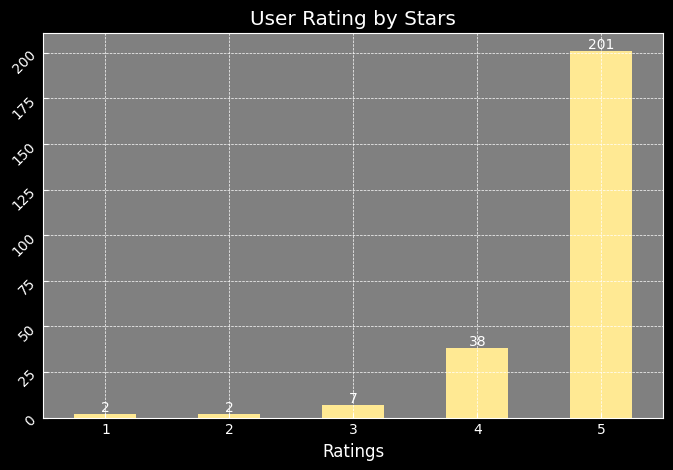

In [9]:
data['rating'].value_counts().sort_index().plot(kind='bar', title='User Rating by Stars', figsize=(8,5), color='#FFE993')
plt.xlabel('Ratings')
plt.tick_params(axis='x', rotation=0)
plt.tick_params(axis='y', rotation=45)
plt.gca().set_facecolor('gray')
for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                   str(bar.get_height()), ha='center', va='bottom',color= 'white')
plt.show()

## **Using VADER Sentiment Scoring**

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
count_vader= {}
for i, row in tqdm(data.iterrows(), total= len(data)):
    text= row['review']
    id= row['userId']
    new = sia.polarity_scores(text)
    vader_new= {}
    for key, value in new.items():
        vader_new[f"vader_{key}"]= value
    count_vader[id]= vader_new

  0%|          | 0/250 [00:00<?, ?it/s]

In [12]:
vader_result= pd.DataFrame(count_vader).T
vader_result

,vader_neg,vader_neu,vader_pos,vader_compound
1,0.040,0.799,0.160,0.8920
2,0.000,0.810,0.190,0.9431
3,0.000,0.721,0.279,0.9720
4,0.000,0.729,0.271,0.9886
5,0.030,0.822,0.147,0.8658
...,...,...,...,...
246,0.000,0.612,0.388,0.9621
247,0.000,0.870,0.130,0.6369
248,0.092,0.719,0.189,0.4497
249,0.067,0.823,0.111,0.5962


In [13]:
vader_result= vader_result.reset_index().rename(columns={'index': 'userId'})
vader_result= vader_result.merge(data)
vader_result

,userId,vader_neg,vader_neu,vader_pos,vader_compound,review,rating
0,1,0.040,0.799,0.160,0.8920,Absolutely beautiful and breathtaking views! H...,5
1,2,0.000,0.810,0.190,0.9431,It is definitely one of the most beautiful pla...,5
2,3,0.000,0.721,0.279,0.9720,I visited the Eiffel Tower recently and it was...,5
3,4,0.000,0.729,0.271,0.9886,It’s literally one of the most beautiful jewel...,5
4,5,0.030,0.822,0.147,0.8658,This place doesn't need an introduction. Name ...,5
...,...,...,...,...,...,...,...
245,246,0.000,0.612,0.388,0.9621,it was absolutely stunning and amazing to fina...,5
246,247,0.000,0.870,0.130,0.6369,of course you have to come here if you are vis...,5
247,248,0.092,0.719,0.189,0.4497,"Wonderful view, but bad management. You must c...",4
248,249,0.067,0.823,0.111,0.5962,"This was amazing to see! But now, when you get...",4


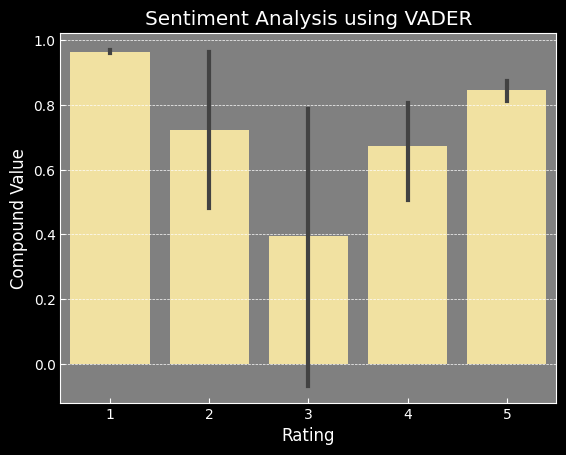

In [14]:
pltVader= sns.barplot(x='rating', y='vader_compound', data=vader_result, color='#FFE993')
pltVader.set_title('Sentiment Analysis using VADER')
pltVader.set_xlabel('Rating')
pltVader.set_ylabel('Compound Value')
pltVader.set_facecolor('gray')
plt.show()

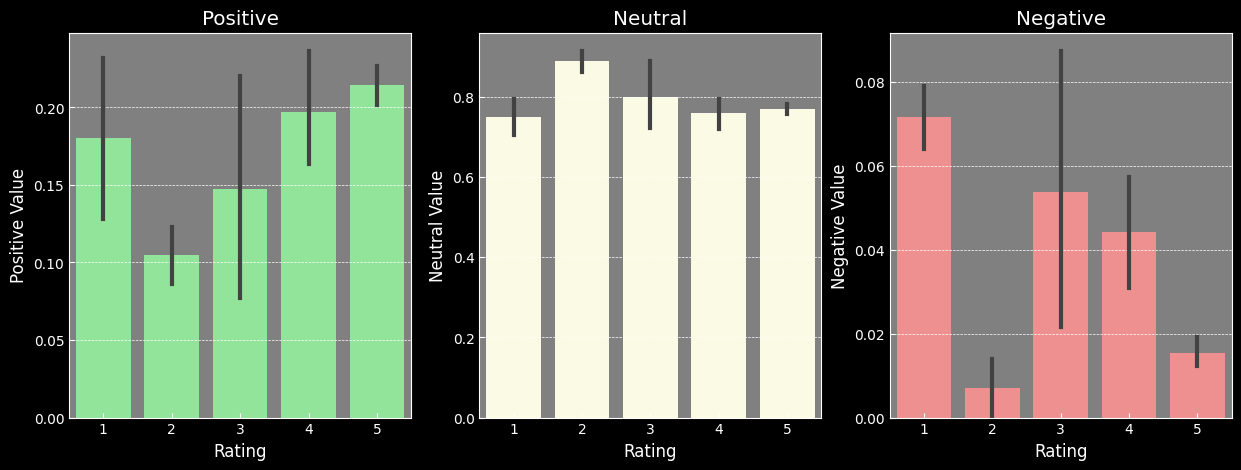

In [15]:
fig, pltVaders= plt.subplots(1,3,figsize=(15,5))
sns.barplot(x='rating', y='vader_pos', data=vader_result, ax=pltVaders[0], color='#83F28F')
sns.barplot(x='rating', y='vader_neu', data=vader_result, ax=pltVaders[1], color='#FFFEE0')
sns.barplot(x='rating', y='vader_neg', data=vader_result, ax=pltVaders[2], color='#FF8080')
pltVaders[0].set_title('Positive')
pltVaders[0].set_xlabel('Rating')
pltVaders[0].set_ylabel('Positive Value')
pltVaders[0].set_facecolor('gray')
pltVaders[1].set_title('Neutral')
pltVaders[1].set_xlabel('Rating')
pltVaders[1].set_ylabel('Neutral Value')
pltVaders[1].set_facecolor('gray')
pltVaders[2].set_title('Negative')
pltVaders[2].set_xlabel('Rating')
pltVaders[2].set_ylabel('Negative Value')
pltVaders[2].set_facecolor('gray')
plt.show()

## **Using RoBERTa Pretrained Model**

In [16]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [17]:
def polarity_scores_roberta(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output.logits[0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [18]:
count_roberta= {}
for i, row in tqdm(data.iterrows(), total= len(data)):
  try:
    text= row['review']
    id= row['userId']
    roberta_new= polarity_scores_roberta(text)
    count_roberta[id]= roberta_new
  except RuntimeError as e :
    print(f'Error for {id}: {e}')

  0%|          | 0/250 [00:00<?, ?it/s]

Error for 28: The expanded size of the tensor (531) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 531].  Tensor sizes: [1, 514]
Error for 62: The expanded size of the tensor (740) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 740].  Tensor sizes: [1, 514]
Error for 67: The expanded size of the tensor (921) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 921].  Tensor sizes: [1, 514]


In [19]:
roberta_result= pd.DataFrame(count_roberta).T
roberta_result

,roberta_neg,roberta_neu,roberta_pos
1,0.002110,0.015620,0.982270
2,0.023253,0.074903,0.901845
3,0.001392,0.007194,0.991414
4,0.001615,0.022416,0.975969
5,0.108496,0.290801,0.600703
...,...,...,...
246,0.009800,0.021948,0.968252
247,0.004617,0.229976,0.765407
248,0.308426,0.433666,0.257908
249,0.051999,0.195893,0.752108


In [20]:
roberta_result= roberta_result.reset_index().rename(columns={'index': 'userId'})
roberta_result= roberta_result.merge(data)
roberta_result

,userId,roberta_neg,roberta_neu,roberta_pos,review,rating
0,1,0.002110,0.015620,0.982270,Absolutely beautiful and breathtaking views! H...,5
1,2,0.023253,0.074903,0.901845,It is definitely one of the most beautiful pla...,5
2,3,0.001392,0.007194,0.991414,I visited the Eiffel Tower recently and it was...,5
3,4,0.001615,0.022416,0.975969,It’s literally one of the most beautiful jewel...,5
4,5,0.108496,0.290801,0.600703,This place doesn't need an introduction. Name ...,5
...,...,...,...,...,...,...
242,246,0.009800,0.021948,0.968252,it was absolutely stunning and amazing to fina...,5
243,247,0.004617,0.229976,0.765407,of course you have to come here if you are vis...,5
244,248,0.308426,0.433666,0.257908,"Wonderful view, but bad management. You must c...",4
245,249,0.051999,0.195893,0.752108,"This was amazing to see! But now, when you get...",4


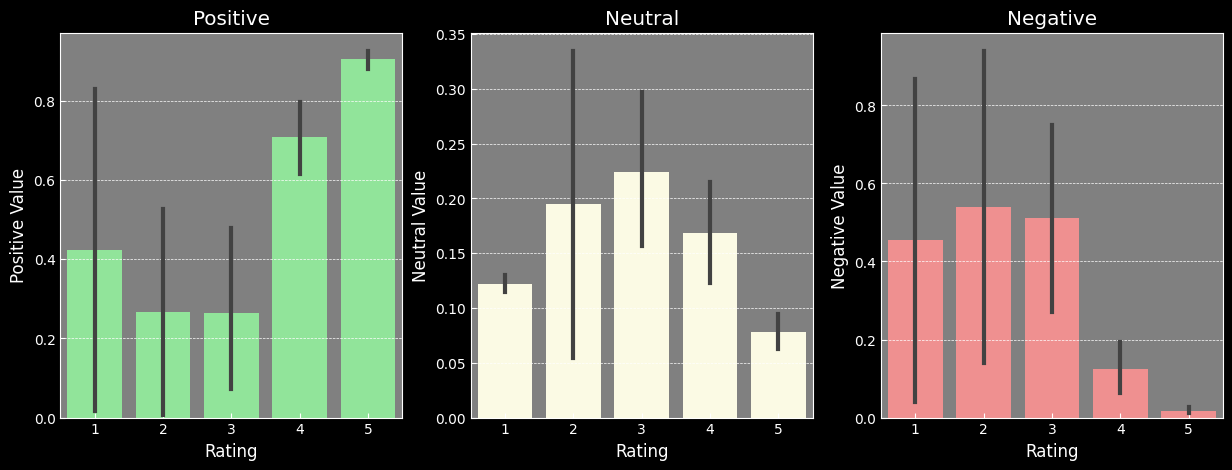

In [21]:
fig, pltRoberta= plt.subplots(1,3,figsize=(15,5))
sns.barplot(x='rating', y='roberta_pos', data=roberta_result, ax=pltRoberta[0], color='#83F28F')
sns.barplot(x='rating', y='roberta_neu', data=roberta_result, ax=pltRoberta[1], color='#FFFEE0')
sns.barplot(x='rating', y='roberta_neg', data=roberta_result, ax=pltRoberta[2], color='#FF8080')
pltRoberta[0].set_title('Positive')
pltRoberta[0].set_xlabel('Rating')
pltRoberta[0].set_ylabel('Positive Value')
pltRoberta[0].set_facecolor('gray')
pltRoberta[1].set_title('Neutral')
pltRoberta[1].set_xlabel('Rating')
pltRoberta[1].set_ylabel('Neutral Value')
pltRoberta[1].set_facecolor('gray')
pltRoberta[2].set_title('Negative')
pltRoberta[2].set_xlabel('Rating')
pltRoberta[2].set_ylabel('Negative Value')
pltRoberta[2].set_facecolor('gray')
plt.show()

## **Comparing VADER and RoBERTa**

In [22]:
compare_result = vader_result.merge(roberta_result)
compare_result

,userId,vader_neg,vader_neu,vader_pos,vader_compound,review,rating,roberta_neg,roberta_neu,roberta_pos
0,1,0.040,0.799,0.160,0.8920,Absolutely beautiful and breathtaking views! H...,5,0.002110,0.015620,0.982270
1,2,0.000,0.810,0.190,0.9431,It is definitely one of the most beautiful pla...,5,0.023253,0.074903,0.901845
2,3,0.000,0.721,0.279,0.9720,I visited the Eiffel Tower recently and it was...,5,0.001392,0.007194,0.991414
3,4,0.000,0.729,0.271,0.9886,It’s literally one of the most beautiful jewel...,5,0.001615,0.022416,0.975969
4,5,0.030,0.822,0.147,0.8658,This place doesn't need an introduction. Name ...,5,0.108496,0.290801,0.600703
...,...,...,...,...,...,...,...,...,...,...
242,246,0.000,0.612,0.388,0.9621,it was absolutely stunning and amazing to fina...,5,0.009800,0.021948,0.968252
243,247,0.000,0.870,0.130,0.6369,of course you have to come here if you are vis...,5,0.004617,0.229976,0.765407
244,248,0.092,0.719,0.189,0.4497,"Wonderful view, but bad management. You must c...",4,0.308426,0.433666,0.257908
245,249,0.067,0.823,0.111,0.5962,"This was amazing to see! But now, when you get...",4,0.051999,0.195893,0.752108


In [23]:
compare_result = compare_result.reset_index()
compare_result = compare_result.set_index(['index','userId', 'vader_neg', 'vader_neu', 'vader_pos',  'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'rating', 'review'])
compare_result

,,,,,,,,,,
index,userId,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,rating,review
0,1,0.040,0.799,0.160,0.8920,0.002110,0.015620,0.982270,5,"Absolutely beautiful and breathtaking views! Highly recommend purchasing tickets ahead of time, especially if you wish to go up to the summit. You can make a line to purchase tickets the day of but it is not guaranteed you’ll get one.\n\nI purchased tickets for the early morning and it was not crowded, I was able to take my time walking the area and when we went up to the summit, it was not crowded. I loved everything about my experience and highly recommend visiting!\n\nI also recommend returning at night to see it light up!"
1,2,0.000,0.810,0.190,0.9431,0.023253,0.074903,0.901845,5,It is definitely one of the most beautiful places in the world. You can call this structure a pile of iron. But I cannot evaluate it as a pile of iron. There is a culture and history there. It has a magical atmosphere. It should definitely be seen at night. I don't think it makes much sense to go to the top floor. It is more beautiful to watch the Eiffel than to watch the view from the Eiffel.
2,3,0.000,0.721,0.279,0.9720,0.001392,0.007194,0.991414,5,"I visited the Eiffel Tower recently and it was absolutely beautiful! The iconic structure is even more breathtaking in person, with its impressive architecture and the panoramic views of Paris from the top. The atmosphere around the tower was so romantic, and surreal. I will never forget my visit. Whether you're visiting during the day or seeing the lights at night, it's truly a memorable experience. Highly recommend to anyone traveling to Paris!"
3,4,0.000,0.729,0.271,0.9886,0.001615,0.022416,0.975969,5,"It’s literally one of the most beautiful jewelry art piece in the entire world, from the ancient time. A majestic and wonderful divinity which is the master piece of the city, my heart city Paris.\nEvery time I crossed it or passed by I make sure to express my gratitude for such a grounding and soothing environment that the Eiffel Tower. Let’s not forget that Paris have been the first city in the world to provide almost all big road arteries electricity and light and it went specially for the world great fair ever from 1889. I wish I was born back then. Paris the light city, the most romantic city and the most artistic. With all my love"
4,5,0.030,0.822,0.147,0.8658,0.108496,0.290801,0.600703,5,This place doesn't need an introduction. Name says it all. We visited the Eiffel Tower during the Easter holiday and it was crowded. The garden in the front was closed. We couldn't get a proper perfect picture. There are good parking spots for cars with feasible rates. The queue to go to the top of the tower was quite very long and the entrance was too crowded. The tower at night has a nice view with the sparkling light. It starts after the sunset and sparkles every hour for fifteen minutes.
...,...,...,...,...,...,...,...,...,...,...
242,246,0.000,0.612,0.388,0.9621,0.009800,0.021948,0.968252,5,"it was absolutely stunning and amazing to finally see in person.\nthere’s a bunch of scammers near the tower so be careful of them, but other than that, it’s worth the visit and an amazing experience. i love it."
243,247,0.000,0.870,0.130,0.6369,0.004617,0.229976,0.765407,5,"of course you have to come here if you are visiting paris, best during golden hour/ evening when the lights start twinkling on the hour after sunset for 5 minutes."
244,248,0.092,0.719,0.189,0.4497,0.308426,0.433666,0.257908,4,"Wonderful view, but bad management. You must chase the ticket office employees to make sure that whether the tickets for 3rd floor (very top of the tower) run out of. They do never announce it.\n\nMeanwhile recommended to visit at night times."


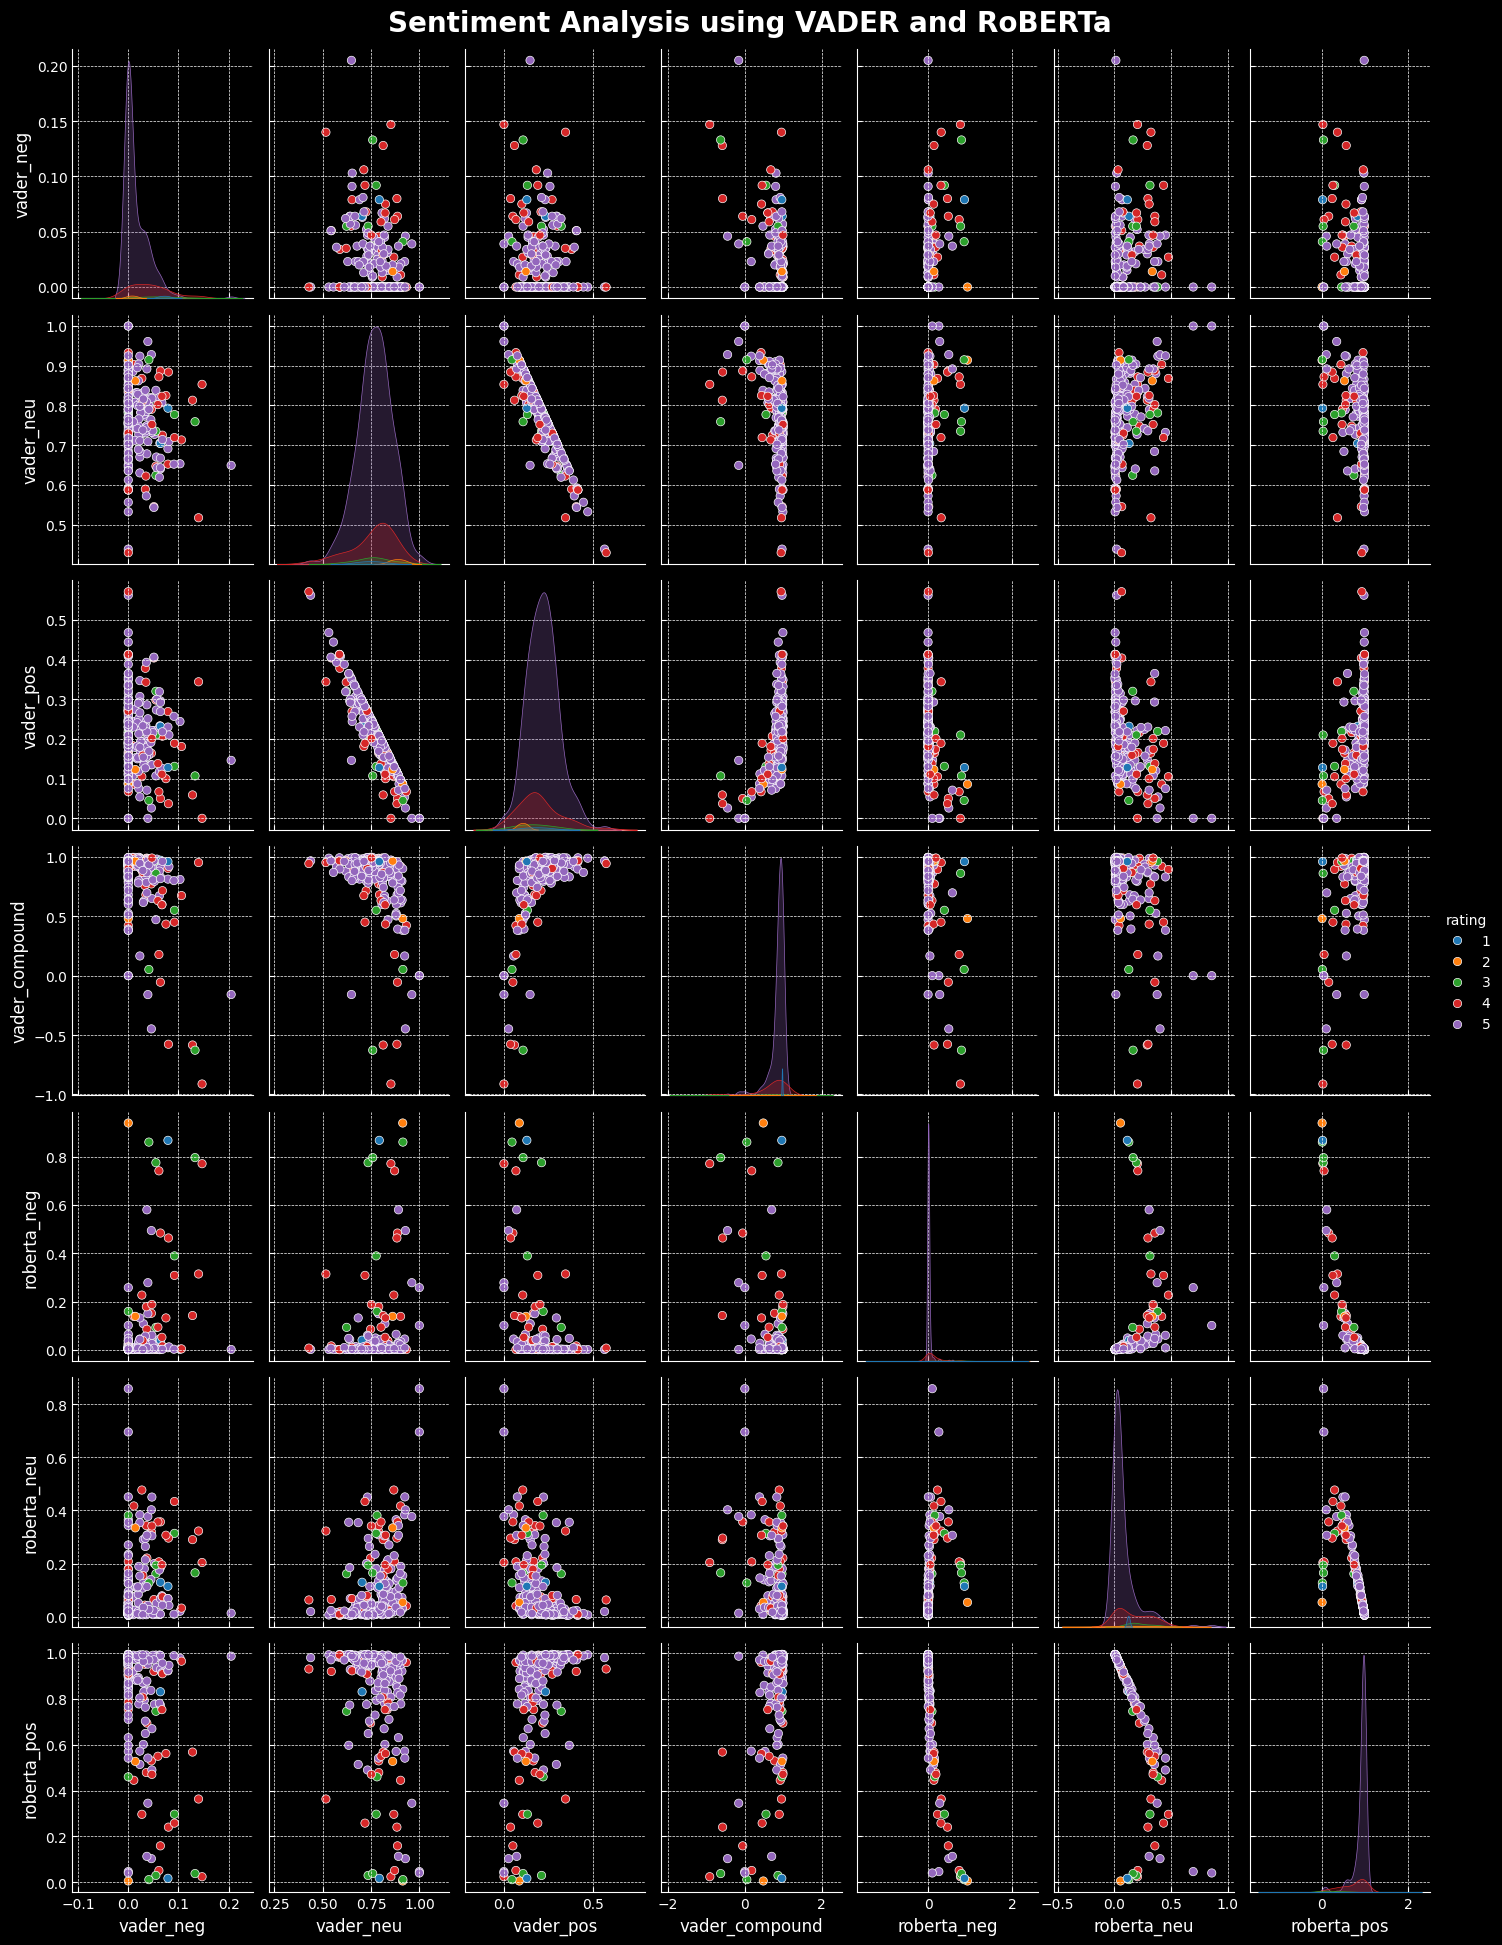

In [24]:
compare_result = compare_result.reset_index()
sophie= sns.pairplot(data= compare_result,
             vars= ['vader_neg', 'vader_neu', 'vader_pos',  'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue= 'rating',
             palette= 'tab10'
             )
sophie.fig.set_size_inches(15, 20)
sophie.fig.suptitle('Sentiment Analysis using VADER and RoBERTa', fontsize=20, fontweight='bold')
sophie.fig.subplots_adjust(top=0.96)
plt.show()

In [25]:
#comparing 5-star negative sentiment reviews
compare_result.query('rating == 5')\
.sort_values(by=['vader_neg'], ascending=False)\
['review'].values[0]

"Didn't disappoint - well worth a visit. We went at 10 pm and there were no queues. Grab a glass of bubbly at the top 🍾🥂"

In [26]:
compare_result.query('rating == 5')\
.sort_values(by=['roberta_neg'], ascending=False)\
['review'].values[0]

'This is a tough review. I give it 5 stars for the experience but I would give it 1 star for the tour group we booked it through.\nI don’t know if it was such an awful experience because it was New Years Day weekend, but we signed up for the 16:00 tour and bought the Sommet (very top) tickets and we didn’t even get the the base of the Tower until close to 18:00. We had dinner reservations for 18:30 and had to change them twice because it took that long to get through the line. We didn’t plan on being out so late and didn’t dress appropriately and it was SO cold. 🥶\nDefinitely splurge for the Sommet if you can. Well worth the money. Plan on at least 4 hrs if you go during the busy'

*From the observations, we can conclude-*

---


**Although VADER is fast for sentiment analysis, RoBERTa is more accurate when compared to VADER.**


---

